In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (10, 7)

In [2]:
import os
from gensim.models import Word2Vec

model = Word2Vec.load(os.path.expanduser('~/.termsuggester/word2vec.model'))

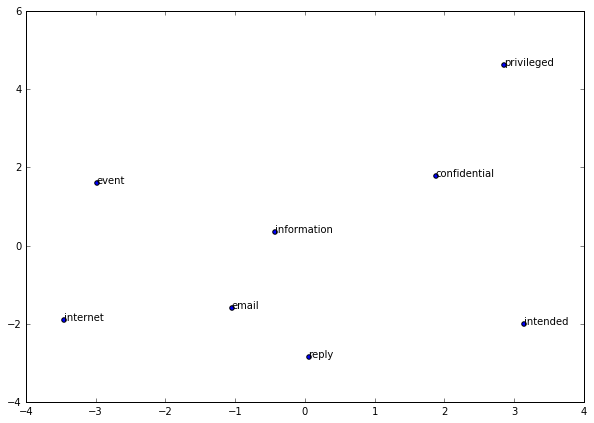

In [41]:
from sklearn.manifold import MDS

suggestions1 = ['man', 'woman', 'money']
suggestions2 = ['golf', 'tournament', 'play', 'kids', 'club', 'tee', 'golfing', 'gt', 'perrino', 'reboot']
suggestions3 = ['event', 'confidential', 'intended', 'privileged', 'reply', 'email', 'internet', 'information']

def plot_mds(suggestions):
    result = pd.DataFrame(index=range(100))
    for s in suggestions:
        result[s] = pd.Series(model[s], index=result.index)

    r = result.transpose()

    clf = MDS()

    coordinates = clf.fit_transform(r.values)
    #print coordinates
    #print coordinates[:, 0]
    plt.scatter(coordinates[:, 0], coordinates[:,1])
    for x, y, label in zip(coordinates[:, 0], coordinates[:, 1], suggestions):
        #print x, y, label
        plt.annotate(label, (x, y))
    plt.show()
plot_mds(suggestions3)

In [40]:
from sklearn.manifold import TSNE

def plot_tsne(suggestions):
    result = pd.DataFrame(index=range(100))
    for s in suggestions:
        result[s] = pd.Series(model[s], index=result.index)

    r = result.transpose()

    clf = TSNE()
    np.set_printoptions(suppress=True)
    coordinates = clf.fit_transform(r.values)
    #print coordinates
    #print coordinates[:, 0]
    plt.scatter(coordinates[:, 0], coordinates[:,1])
    for x, y, label in zip(coordinates[:, 0], coordinates[:, 1], suggestions):
        #print x, y, label
        plt.annotate(label, (x, y))
    plt.show()
plot_tsne(suggestions3)

ValueError: Buffer dtype mismatch, expected 'float_t' but got 'float'